In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error

In [37]:
t = pd.read_csv("prediction.csv")
t.tail(5)

,date,region,confirmed,1_day_change,3_day_change,7_day_change,1_day_change_rate,3_day_change_rate,7_day_change_rate,last_day,kalman_prediction
2536,2020-04-11,India_West Bengal,126,13,25,53,12.621359,27.472527,84.126984,116,122.0
2537,2020-04-12,India_West Bengal,134,10,27,57,8.620690,27.272727,82.608696,126,132.0
2538,2020-04-13,India_West Bengal,152,8,31,54,6.349206,30.097087,67.500000,134,142.0
2539,2020-04-14,India_West Bengal,190,18,36,72,13.432836,31.034483,90.000000,152,157.0
2540,2020-04-15,India_West Bengal,0,38,64,99,25.000000,50.793651,108.791209,190,187.0


In [3]:
ts = pd.read_csv("ts_r_global8may.csv")
ts.tail(5)

,Unnamed: 0,date,US_nan
103,103,2020-05-04,1180375
104,104,2020-05-05,1204351
105,105,2020-05-06,1228603
106,106,2020-05-07,1257023
107,107,2020-05-08,1283929


In [4]:
ts.columns

Index(['Unnamed: 0', 'date', 'India_Andaman and Nicobar Islands',
       'India_Andhra Pradesh', 'India_Arunachal Pradesh', 'India_Assam',
       'India_Bihar', 'India_Chandigarh', 'India_Chhattisgarh',
       'India_Dadar Nagar Haveli', 'India_Delhi', 'India_Goa', 'India_Gujarat',
       'India_Haryana', 'India_Himachal Pradesh', 'India_Jammu and Kashmir',
       'India_Jharkhand', 'India_Karnataka', 'India_Kerala', 'India_Ladakh',
       'India_Madhya Pradesh', 'India_Maharashtra', 'India_Manipur',
       'India_Meghalaya', 'India_Mizoram', 'India_Nagaland', 'India_Odisha',
       'India_Puducherry', 'India_Punjab', 'India_Rajasthan',
       'India_Tamil Nadu', 'India_Telengana', 'India_Tripura',
       'India_Uttar Pradesh', 'India_Uttarakhand', 'India_West Bengal'],
      dtype='object')

In [22]:
regions=['date','India_Andhra Pradesh', 'India_Delhi', 'India_Gujarat',
        'India_Haryana', 'India_Jammu and Kashmir', 'India_Karnataka',
        'India_Kerala', 'India_Madhya Pradesh', 'India_Maharashtra',
        'India_Punjab', 'India_Rajasthan', 'India_Tamil Nadu',
        'India_Telengana', 'India_Uttar Pradesh', 'India_West Bengal']

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

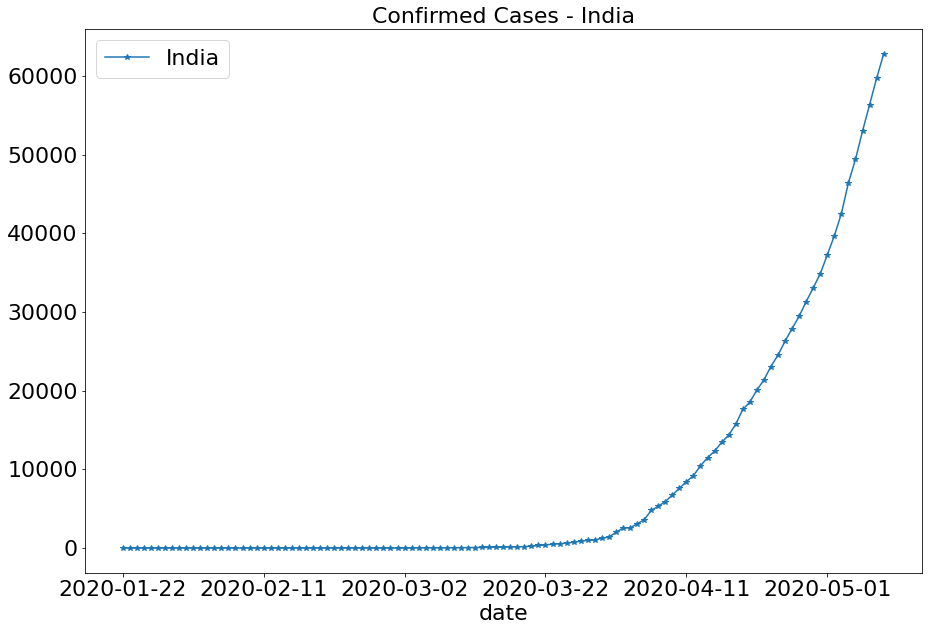

In [37]:
#p=ts[regions]
p=ts[["date","India_nan"]]
p = p.rename(columns={"India_nan":"India"})
p = p.set_index("date")
p.iloc[:,:].plot(marker='*',x_compat=True,figsize=(15,10)).set_title('Confirmed Cases - India',fontdict={'fontsize': 22})
fig = plt.gcf()
fig.savefig("Confirmed_Cases_India"+".png")

In [25]:
new=prediction.loc[prediction["region"]==region][["date","X"]]
new["Confirmed_Cases"] = p["Confirmed_Cases"]
#new=new.set_index(["date"])
new = new.reset_index(drop=True)
new["X"]=round(new["X"])
new = new.rename(columns={"X":"Kalman Prediction"})
new

,date,Kalman Prediction,Confirmed_Cases
0,2020-03-01,0.0,0
1,2020-03-02,3.0,0
2,2020-03-03,7.0,0
3,2020-03-04,6.0,0
4,2020-03-05,29.0,0
5,2020-03-06,37.0,0
6,2020-03-07,41.0,0
7,2020-03-08,43.0,0
8,2020-03-09,46.0,0
9,2020-03-10,49.0,0


In [208]:
for i in range(p.shape[0]):
    new.loc[i,"Confirmed_Cases"]=p.iloc[i]["Confirmed_Cases"]

In [180]:
new = new.set_index(["date"])


In [181]:
new

,Kalman Prediction,Confirmed_Cases
date,,
2020-01-30,0.0,1.0
2020-01-31,1.0,1.0
2020-02-01,1.0,2.0
2020-02-02,2.0,3.0
2020-02-03,3.0,3.0
...,...,...
2020-04-17,388.0,NaN
2020-04-18,399.0,NaN
2020-04-19,409.0,NaN


Text(10, 100, 'hi trger')

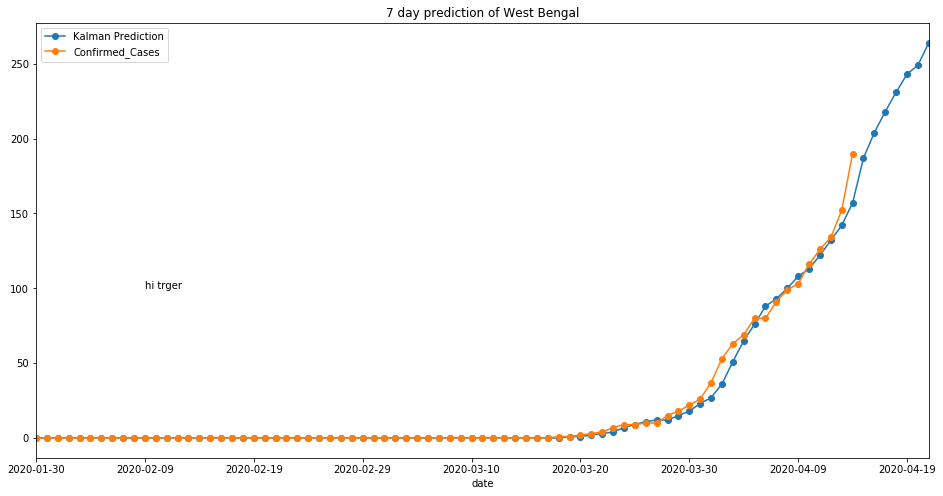

In [191]:
new.plot(marker='o',figsize=(16,8)).set_title("7 day prediction of "+region.split("_")[1])
plt.text(10,100,"hi trger")

In [211]:
pred=np.array(new.loc[new["date"]>="2020-04-15"].iloc[:,0])
pred

array(['2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
       '2020-04-19', '2020-04-20', '2020-04-21'], dtype=object)

In [198]:
evaluation=[]
pred=np.array(new.loc[new["date"]>="2020-04-15"].iloc[:,0])
ex=np.array(new.iloc[:,1])
evaluation.append({'region': region,
                              'mse': np.power((ex - pred),2).mean(),
                              'rmse':sqrt(mean_squared_error(ex,pred)),
                              'mae': (abs(ex - pred)).mean()})
print(evaluation)

[{'region': 'India_West Bengal', 'mse': 443.67469879518075, 'rmse': 21.06358703533614, 'mae': 6.879518072289157}]


In [4]:
plt.rcParams.update({'font.size': 22})


In [11]:
prediction = pd.read_csv("us.csv")
prediction

,region,date,Y,X,X2
0,US_nan,2020-01-22,1,0.000000e+00,0.0000
1,US_nan,2020-01-23,1,1.158919e+00,0.3715
2,US_nan,2020-01-24,2,1.034256e+00,0.0578
3,US_nan,2020-01-25,2,2.319544e+00,1.1005
4,US_nan,2020-01-26,5,2.494099e+00,0.8832
...,...,...,...,...,...
103,US_nan,2020-05-04,1223227,1.180285e+06,75910.4079
104,US_nan,2020-05-05,1223227,1.202429e+06,80152.7106
105,US_nan,2020-05-06,1223227,1.230483e+06,70580.6791
106,US_nan,2020-05-07,1223227,1.261092e+06,55090.6548


# Main Code Below

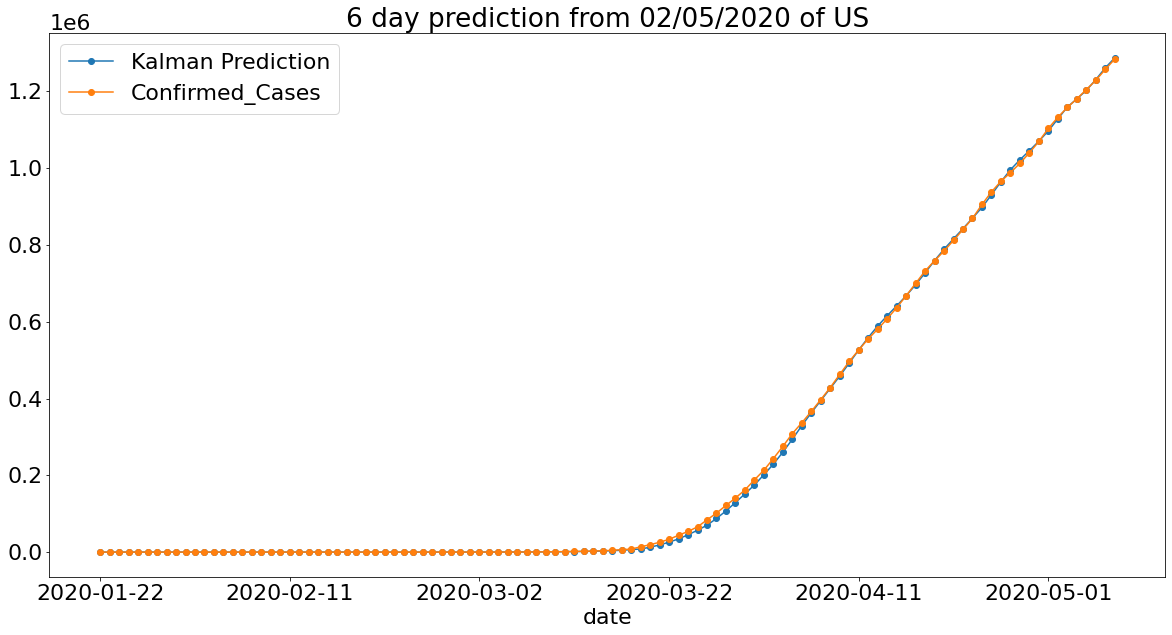

In [12]:
#main code to plot and error calculation

# regions=['India_Andhra Pradesh', 'India_Delhi', 'India_Gujarat',
#        'India_Haryana', 'India_Jammu and Kashmir', 'India_Karnataka',
#        'India_Kerala', 'India_Madhya Pradesh', 'India_Maharashtra',
#        'India_Punjab', 'India_Rajasthan', 'India_Tamil Nadu',
#        'India_Telengana', 'India_Uttar Pradesh', 'India_West Bengal']
regions = ["US_nan"]
evaluation=[]

for region in regions:
    p=ts[['date',region]]
    p=p.rename(columns={region:"Confirmed_Cases"})
    
    new=prediction.loc[prediction["region"]==region][["date","X"]]
    new["Confirmed_Cases"] = p["Confirmed_Cases"]
    #new=new.set_index(["date"])
    new = new.reset_index(drop=True)
    new["X"]=round(new["X"])
    new = new.rename(columns={"X":"Kalman Prediction"})
    for i in range(p.shape[0]):
        new.loc[i,"Confirmed_Cases"]=p.iloc[i]["Confirmed_Cases"]  
    pred=np.array(new.loc[new["date"]>="2020-05-02"].iloc[:,1])
    ex=np.array(new.loc[new["date"]>="2020-05-02"].iloc[:,2])
    evaluation.append({'region': region,'mae': (abs(ex - pred)).mean()})
    new = new.set_index(["date"])
    fig = new.plot(marker='o',figsize=(20,10)).set_title("6 day prediction from 02/05/2020 of "+region.split("_")[0])
    #plt.text(10,200,"Prediction Done for 15/04 to 21/04 on training data till 14/04 \n Metric Error Results: MSE: {}   RMSE: {}   MAE: {} ".format(evaluation["mse"],evaluation['rmse'],evaluation["mae"]))
    fig = plt.gcf()
    fig.savefig(""+region.split("_")[0]+".png")
    

In [13]:
evaluation

[{'region': 'US_nan', 'mae': 2353.4285714285716}]

In [233]:
from fpdf import FPDF
import glob
import cv2

In [234]:
from PIL import Image
im_list = []
for file in glob.glob("*.png"):
    im=Image.open(file)
    rgb = Image.new('RGB', im.size, (255, 255, 255))  # white background
    rgb.paste(im, mask=im.split()[3])  
    im_list.append(rgb)



In [235]:
pdf1_filename = "30daypredictsfrom21APRIL.pdf"

im_list[0].save(pdf1_filename, "PDF" ,resolution=100.0, save_all=True, append_images=im_list[1:])

In [55]:
regions=['India_Andhra Pradesh', 'India_Delhi', 'India_Gujarat',
       'India_Haryana', 'India_Jammu and Kashmir', 'India_Karnataka',
       'India_Kerala', 'India_Madhya Pradesh', 'India_Maharashtra',
       'India_Punjab', 'India_Rajasthan', 'India_Tamil Nadu',
       'India_Telengana', 'India_Uttar Pradesh', 'India_West Bengal']

In [47]:
import pandas as pd

In [48]:
mapping={}
for i in list(pd.read_csv("ts_r.csv").columns):
    mapping[i]=""

In [49]:
del mapping["date"]

In [50]:
mapping = {'India_Andhra Pradesh': 'Vishakhapatnam',
 'India_Delhi': 'New+Delhi',
 'India_Gujarat': 'Ahmedabad',
 'India_Haryana': 'Chandigarh',
 'India_Jammu and Kashmir': 'Srinagar',
 'India_Karnataka': 'Bengaluru',
 'India_Kerala': 'Thiruvananthapuram',
 'India_Madhya Pradesh': 'Indore',
 'India_Maharashtra': 'Mumbai',
 'India_Punjab': 'Chandigarh',
 'India_Rajasthan': 'Jaipur',
 'India_Tamil Nadu': 'Chennai',
 'India_Telengana': 'Hyderabad',
 'India_Uttar Pradesh': 'Lucknow',
 'India_West Bengal': 'Kolkata'}

In [51]:
mapping

{'India_Andhra Pradesh': 'Vishakhapatnam',
 'India_Delhi': 'New+Delhi',
 'India_Gujarat': 'Ahmedabad',
 'India_Haryana': 'Chandigarh',
 'India_Jammu and Kashmir': 'Srinagar',
 'India_Karnataka': 'Bengaluru',
 'India_Kerala': 'Thiruvananthapuram',
 'India_Madhya Pradesh': 'Indore',
 'India_Maharashtra': 'Mumbai',
 'India_Punjab': 'Chandigarh',
 'India_Rajasthan': 'Jaipur',
 'India_Tamil Nadu': 'Chennai',
 'India_Telengana': 'Hyderabad',
 'India_Uttar Pradesh': 'Lucknow',
 'India_West Bengal': 'Kolkata'}

In [52]:
city = list(mapping.values())

In [53]:
city

['Vishakhapatnam',
 'New+Delhi',
 'Ahmedabad',
 'Chandigarh',
 'Srinagar',
 'Bengaluru',
 'Thiruvananthapuram',
 'Indore',
 'Mumbai',
 'Chandigarh',
 'Jaipur',
 'Chennai',
 'Hyderabad',
 'Lucknow',
 'Kolkata']

In [46]:
from wwo_hist import retrieve_hist_data

In [56]:
#get weather data
    
frequency = 24
start_date = '30-JAN-2020'
end_date = '09-MAY-2020'
api_key = '08006ae11aca415f9cb103546202104'
location_list = city
hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)



Retrieving weather data for Vishakhapatnam


Currently retrieving data for Vishakhapatnam: from 2020-01-30 to 2020-01-31
Time elapsed (hh:mm:ss.ms) 0:00:01.692806
Currently retrieving data for Vishakhapatnam: from 2020-02-01 to 2020-02-29
Time elapsed (hh:mm:ss.ms) 0:00:03.861910
Currently retrieving data for Vishakhapatnam: from 2020-03-01 to 2020-03-31
Time elapsed (hh:mm:ss.ms) 0:00:05.735825
Currently retrieving data for Vishakhapatnam: from 2020-04-01 to 2020-04-30
Time elapsed (hh:mm:ss.ms) 0:00:08.227645
Currently retrieving data for Vishakhapatnam: from 2020-05-01 to 2020-05-09
Time elapsed (hh:mm:ss.ms) 0:00:09.278344


export Vishakhapatnam completed!




Retrieving weather data for New+Delhi


Currently retrieving data for New+Delhi: from 2020-01-30 to 2020-01-31
Time elapsed (hh:mm:ss.ms) 0:00:01.176149
Currently retrieving data for New+Delhi: from 2020-02-01 to 2020-02-29
Time elapsed (hh:mm:ss.ms) 0:00:02.949098
Currently retrieving data for New+Delhi: from 2020-03-01 t

Time elapsed (hh:mm:ss.ms) 0:00:08.575548


export Hyderabad completed!




Retrieving weather data for Lucknow


Currently retrieving data for Lucknow: from 2020-01-30 to 2020-01-31
Time elapsed (hh:mm:ss.ms) 0:00:01.106950
Currently retrieving data for Lucknow: from 2020-02-01 to 2020-02-29
Time elapsed (hh:mm:ss.ms) 0:00:02.754009
Currently retrieving data for Lucknow: from 2020-03-01 to 2020-03-31
Time elapsed (hh:mm:ss.ms) 0:00:05.045839
Currently retrieving data for Lucknow: from 2020-04-01 to 2020-04-30
Time elapsed (hh:mm:ss.ms) 0:00:07.406789
Currently retrieving data for Lucknow: from 2020-05-01 to 2020-05-09
Time elapsed (hh:mm:ss.ms) 0:00:08.714095


export Lucknow completed!




Retrieving weather data for Kolkata


Currently retrieving data for Kolkata: from 2020-01-30 to 2020-01-31
Time elapsed (hh:mm:ss.ms) 0:00:01.000366
Currently retrieving data for Kolkata: from 2020-02-01 to 2020-02-29
Time elapsed (hh:mm:ss.ms) 0:00:04.074725
Currently retrieving data for Kolkata: 

In [59]:
df = pd.DataFrame([])

In [60]:
df

""


In [61]:
for region in mapping:
    print(mapping[region])
    df = pd.read_csv(mapping[region]+".csv")
    df['region'] = region
    data=data.append(df)

Vishakhapatnam
New+Delhi
Ahmedabad
Chandigarh
Srinagar
Bengaluru
Thiruvananthapuram
Indore
Mumbai
Chandigarh
Jaipur
Chennai
Hyderabad
Lucknow
Kolkata


In [62]:
data.to_csv("weather.csv",index=False)